# 1. Load the Wine Quality dataset into a Python environment.

In [1]:
# Importing Libraries/packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the Dataset

red = pd.read_csv("winequality-red.csv", sep=';')
white = pd.read_csv("winequality-white.csv", sep=';')

In [3]:
red.head()
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


# 2. Clean and Prepare the Data

In [6]:
# Number of samples and columns in each dataset

print("Number of samples and columns in red wine dataset= ", red.shape)
print("Number of samples and columns in white wine dataset= ", white.shape)

Number of samples and columns in red wine dataset=  (1599, 12)
Number of samples and columns in white wine dataset=  (4898, 12)


In [7]:
# Unique values of quality in the red wine dataset
red["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [8]:
# Unique values of quality in the white wine dataset
white["quality"].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [9]:
# Mean density in the red wine dataset
red["density"].mean()

0.9967466791744841

In [10]:
# Check for missing values in the Red Wine dataset
red_missing_values = red.isnull().sum()
print("Red Wine Missing Values:")
print(red_missing_values)

# Check for missing values in the White Wine dataset
white_missing_values = white.isnull().sum()
print("White Wine Missing Values:")
print(white_missing_values)


Red Wine Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
White Wine Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [11]:
# Check for any duplicate rows in both dataset
print(red.duplicated().sum())
print(white.duplicated().sum())

240
937


In [12]:
# Remove the duplicate rows
red.drop_duplicates(inplace=True)
white.drop_duplicates(inplace=True)

In [13]:
# Check for any duplicate rows in both dataset after removing them
print(red.duplicated().sum())
print(white.duplicated().sum())

0
0


In [14]:
# create color array for red dataframe
color_red = np.repeat('red',red.shape[0])

# create color array for white dataframe
color_white = np.repeat('white',white.shape[0])

red['color'] = color_red
white['color'] = color_white

# append dataframes
wine = pd.concat([red, white], ignore_index=True)

# view dataframe to check
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
5,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
6,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
7,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
8,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,red


# 3. Explore the data using visualizations and statistical analyses.

In [15]:
# Set the color palette for plots
sns.set_palette("husl")

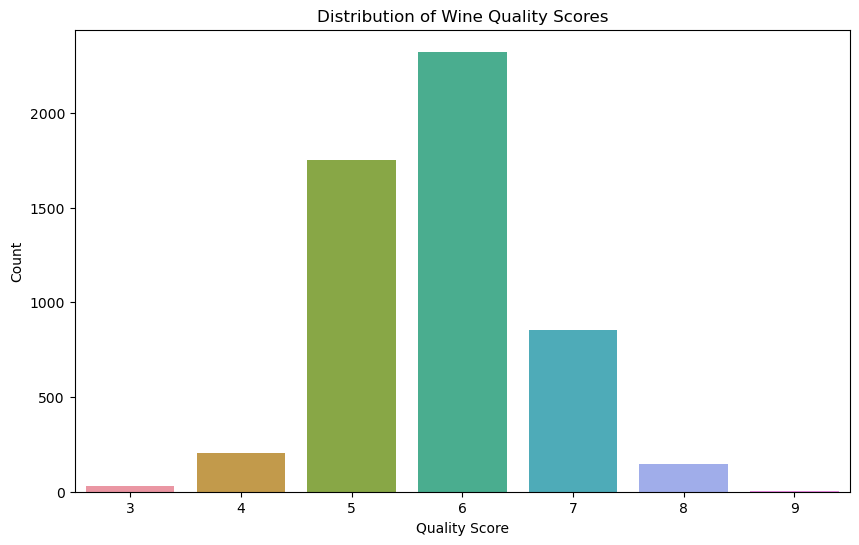

In [16]:
# Distribution of Wine Quality Scores (Red and White)
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=wine)
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

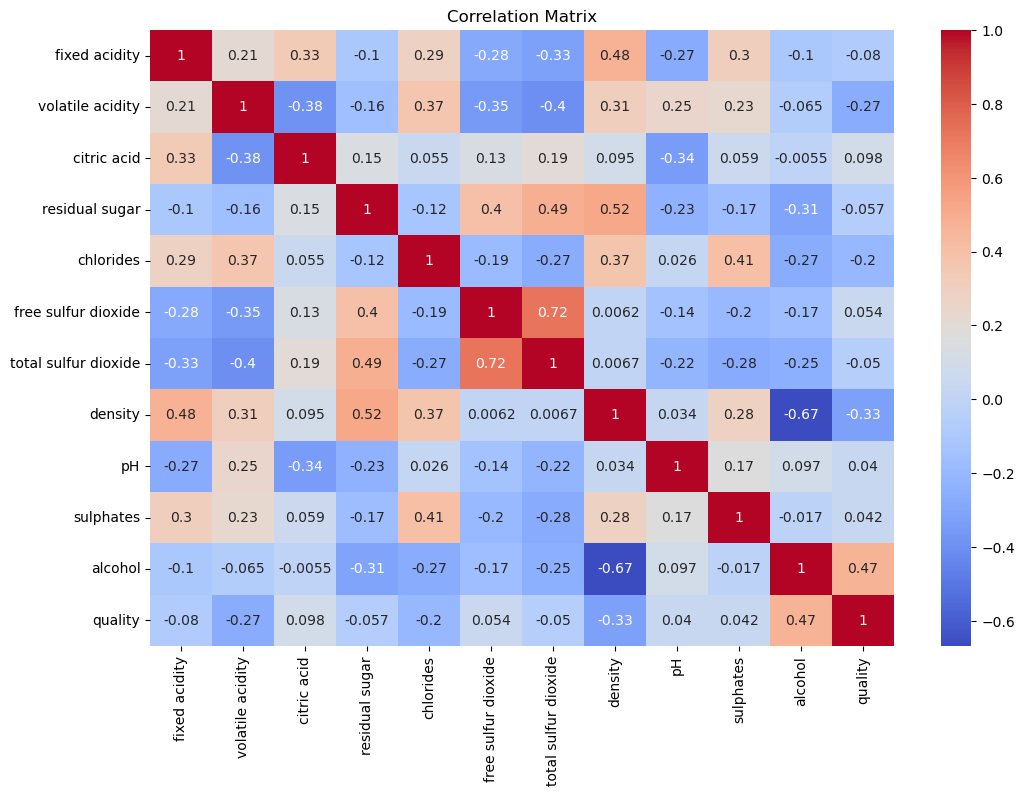

In [17]:
# Correlation Heatmap
correlation_matrix = wine.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

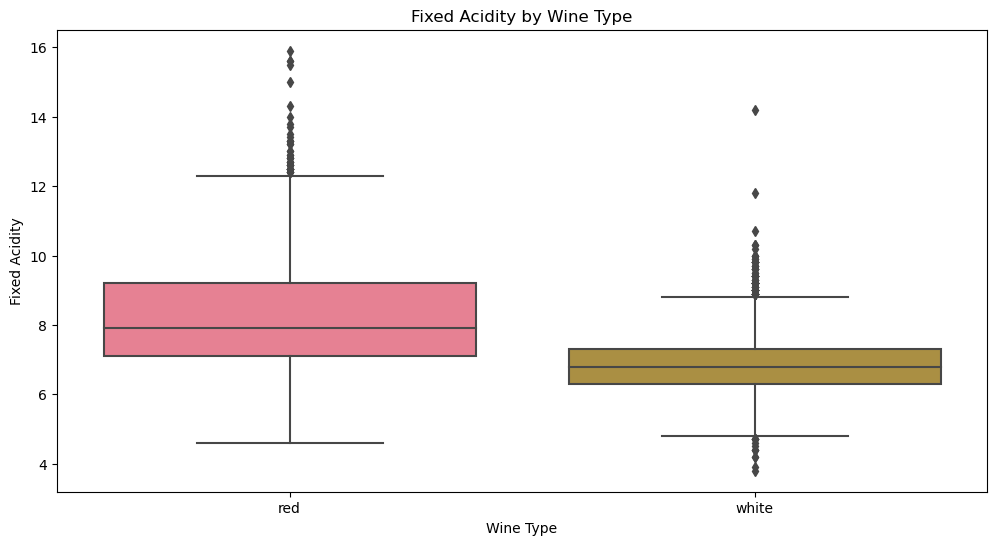

In [18]:
# Boxplots of features by wine type
plt.figure(figsize=(12, 6))
sns.boxplot(x="color", y="fixed acidity", data=wine)
plt.title('Fixed Acidity by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('Fixed Acidity')
plt.show()

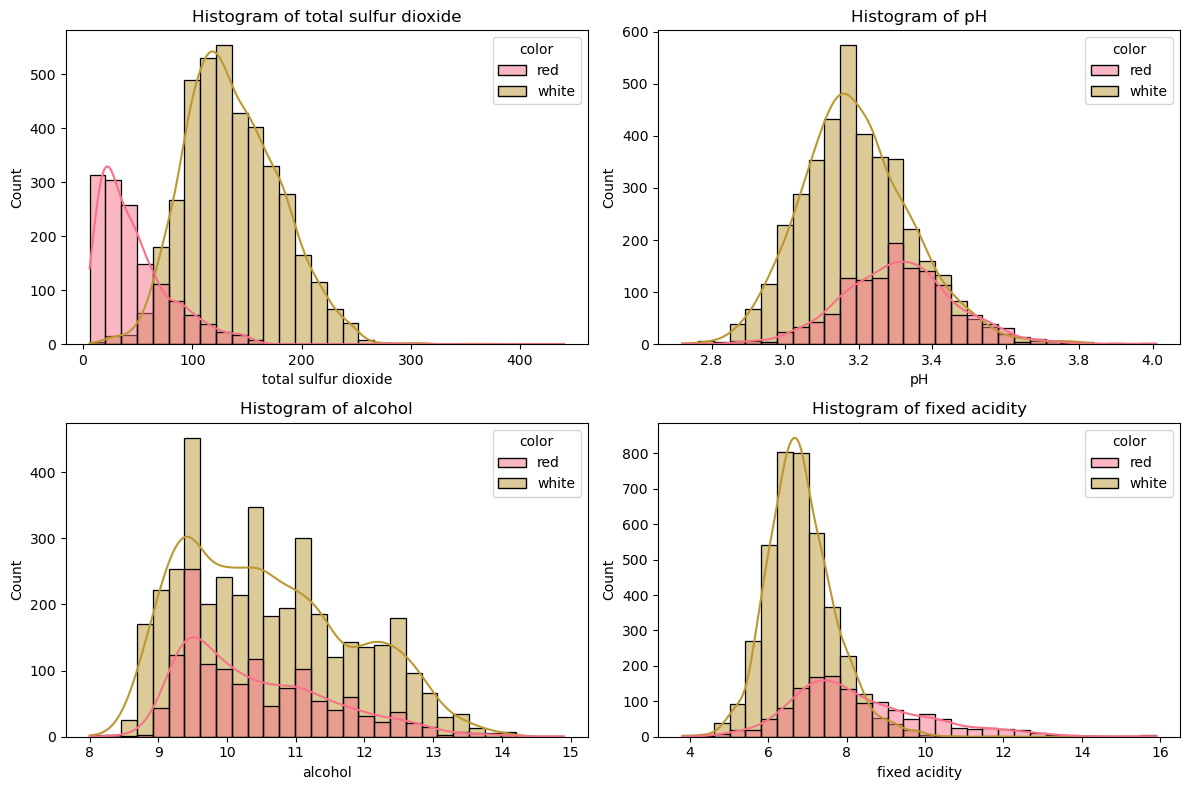

In [19]:
# Create subplots for histograms of selected columns
selected_columns = ['total sulfur dioxide', 'pH', 'alcohol', 'fixed acidity']

plt.figure(figsize=(12, 8))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=wine, x=column, hue="color", kde=True, bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    
plt.tight_layout()
plt.show()

**Based on histograms of columns in this dataset, which feature variables appear skewed to the right?**

Fixed Acidity and Alcohol

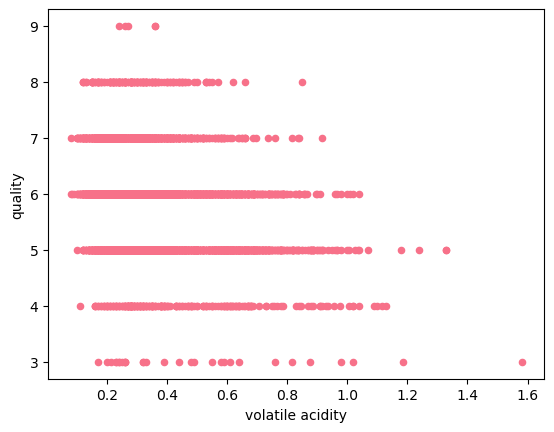

In [20]:
wine.plot(x="volatile acidity", y="quality", kind="scatter");

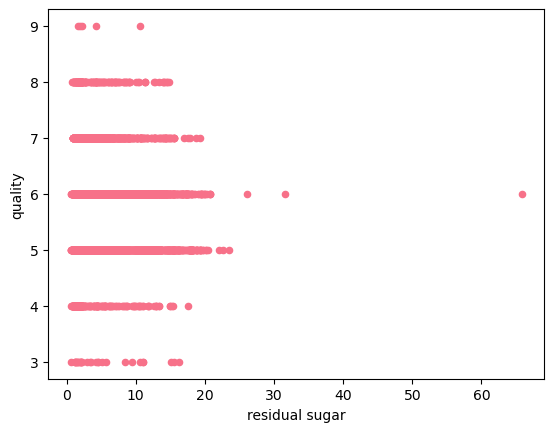

In [21]:
wine.plot(x="residual sugar", y="quality", kind="scatter");

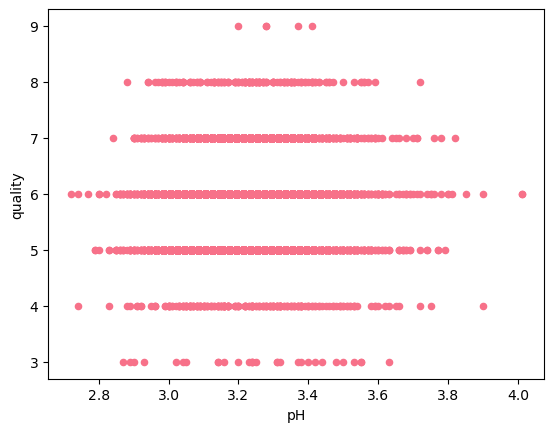

In [22]:
wine.plot(x="pH", y="quality", kind="scatter");

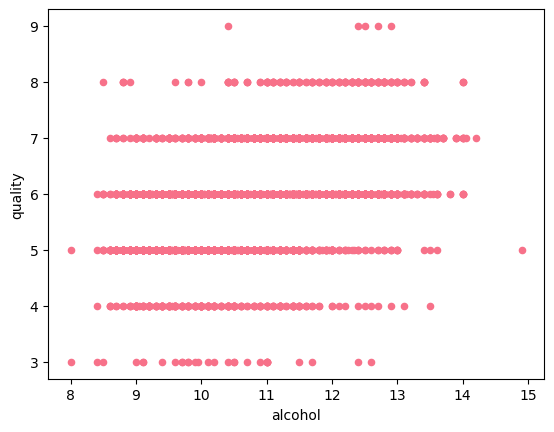

In [23]:
wine.plot(x="alcohol", y="quality", kind="scatter");

**We can see a positive relation to quality with alcohol here**

## Which type of wine (red or white) associated with higher quality?

In [24]:
wine.groupby(by="color")["quality"].mean()

color
red      5.623252
white    5.854835
Name: quality, dtype: float64

**Red wine has higer avearge quality than white wine.**

## Do sweeter wines receive better ratings?

In [25]:
wine["residual sugar"].median()

2.7

In [26]:
# select samples with residual sugar less than the median
low_sugar = wine[wine['residual sugar'] < 3 ]

# select samples with residual sugar greater than or equal to the median
high_sugar = wine[wine['residual sugar'] >= 3]

# ensure these queries included each sample exactly once
num_samples = wine.shape[0]
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True

True

In [27]:
# get mean quality rating for the low sugar and high sugar groups
print(f'quality rating for low sugar is {round(low_sugar.quality.mean(),2)}')
print(f'quality rating for high sugar is {round(high_sugar.quality.mean(),2)}')

quality rating for low sugar is 5.79
quality rating for high sugar is 5.8


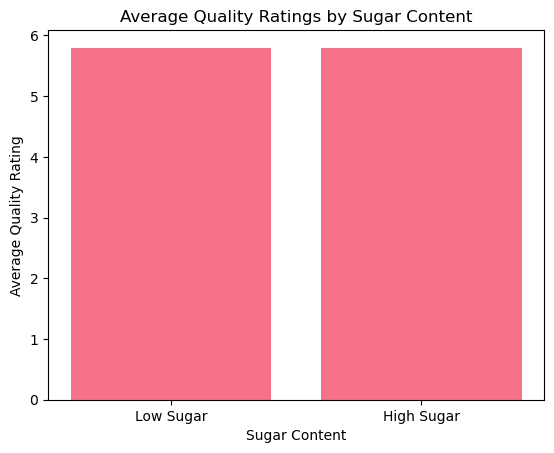

In [28]:
mean_sug_low = low_sugar['quality'].mean()
mean_sug_high = high_sugar['quality'].mean()
loc = [1,2]
yval = [mean_sug_low,mean_sug_high]
lab = ['Low Sugar','High Sugar']
plt.bar(loc, yval, tick_label=lab)
plt.title("Average Quality Ratings by Sugar Content")
plt.xlabel('Sugar Content')
plt.ylabel('Average Quality Rating');

**Sweeter wines recived higher average rating by 0.01 more.**

## Do wines with higher alcoholic content receive better ratings?

In [29]:
# get the median amount of alcohol content
wine.alcohol.median()

10.4

In [30]:
# select samples with alcohol content less than the median
low_alcohol = wine.query('alcohol < 10.3')

# select samples with alcohol content greater than or equal to the median
high_alcohol = wine.query('alcohol >= 10.3')

# ensure these queries included each sample exactly once
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

In [31]:
print(low_alcohol['quality'].mean())
print(high_alcohol['quality'].mean())

5.428057553956834
6.122072391767211


In [32]:
mean_quality_low = low_alcohol['quality'].mean()
mean_quality_high = high_alcohol['quality'].mean()

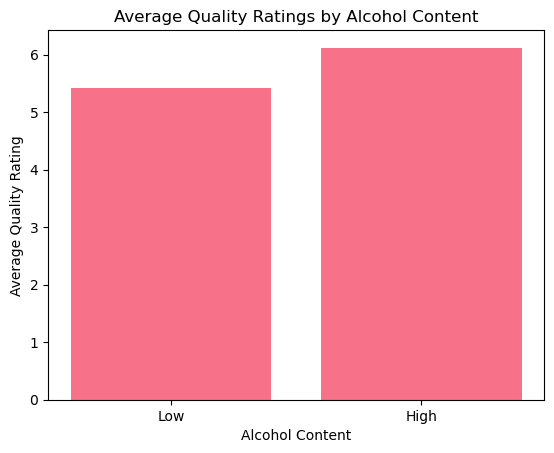

In [33]:
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

**Wines with higher alcohol content received higher rating**

# 4. Answer the following questions using Python:

## What is the distribution of the wine quality scores?

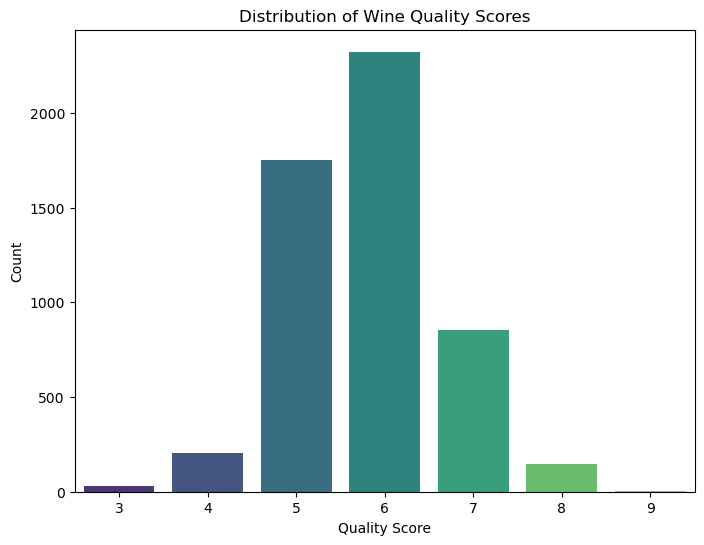

In [34]:
# Create a histogram of wine quality scores
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=wine, palette='viridis')
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

## What is the relationship between the different features and wine quality?

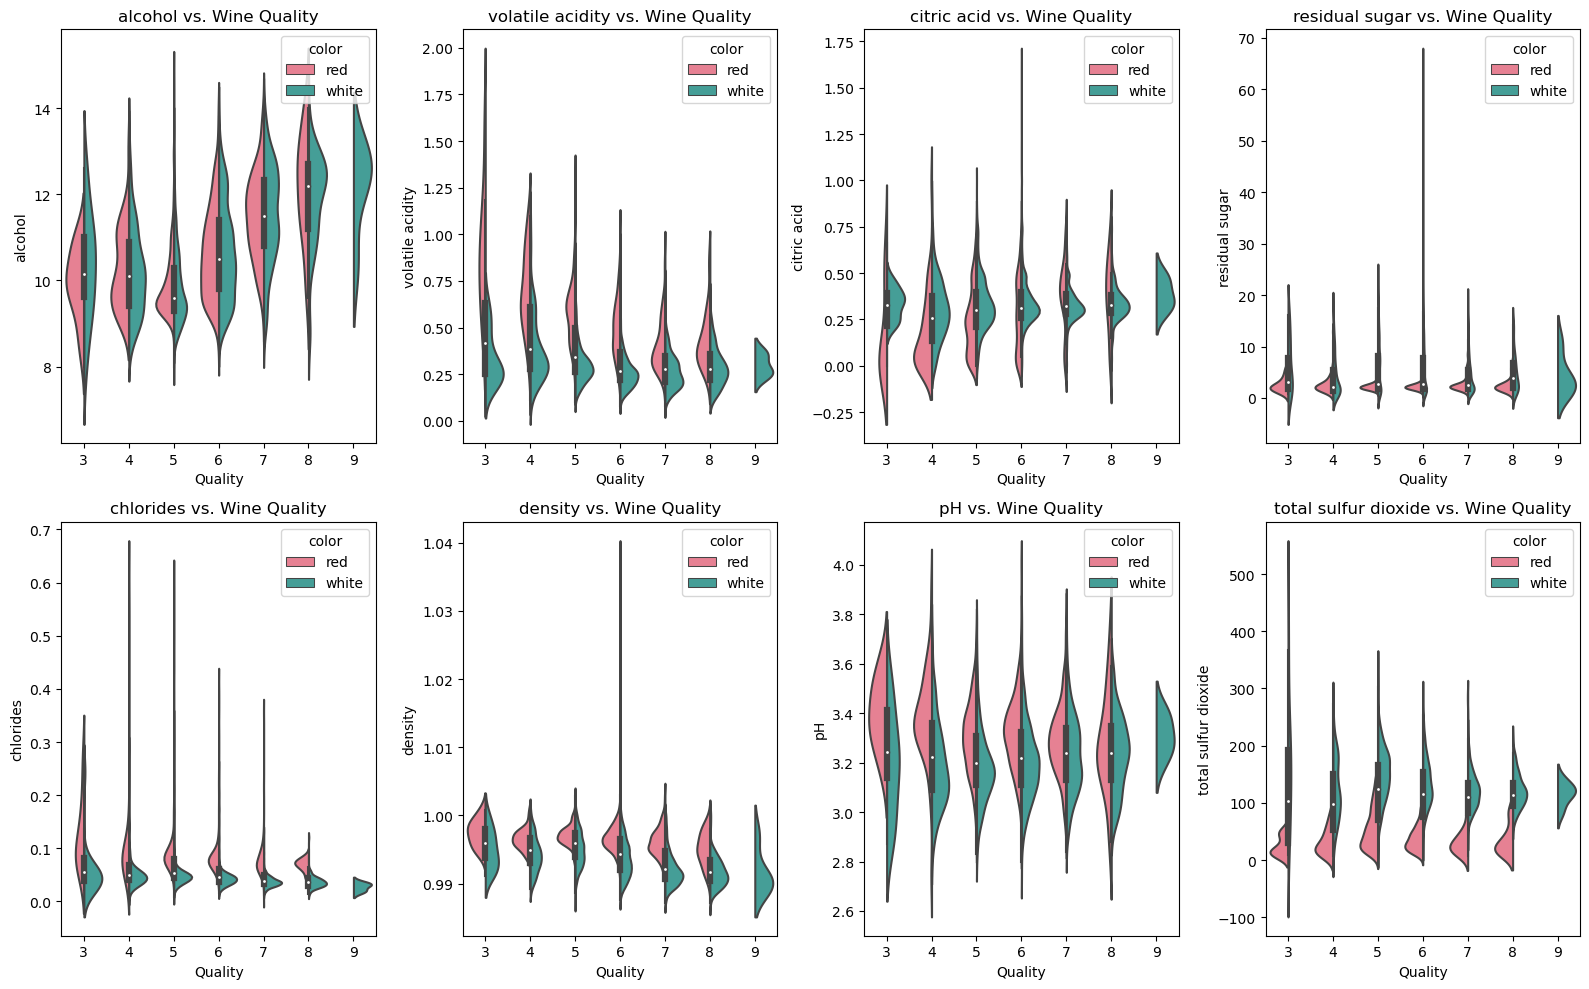

In [35]:
# Visualize the relationship between selected features and wine quality
selected_features = ['alcohol', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'density', 'pH', 'total sulfur dioxide']

# Create subplots to visualize feature vs. wine quality
plt.figure(figsize=(16, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 4, i)
    sns.violinplot(x='quality', y=feature, data=wine, hue='color', split=True, palette='husl')
    plt.title(f'{feature} vs. Wine Quality')
    plt.xlabel('Quality')
    plt.ylabel(feature)
    
plt.tight_layout()
plt.show()

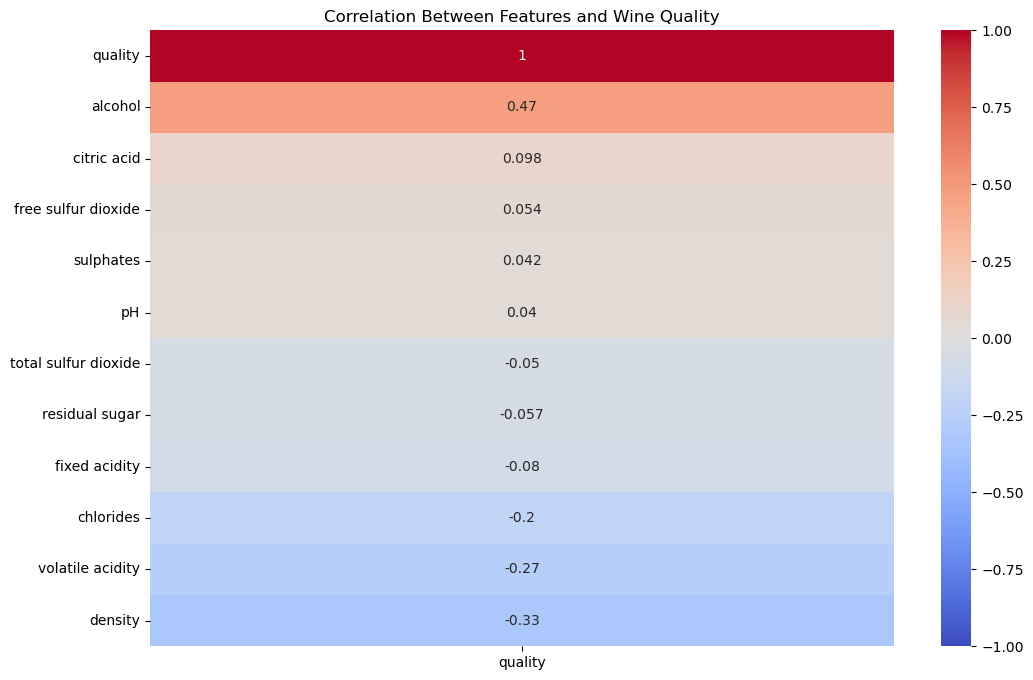

In [36]:
# Calculate and visualize correlations between features and wine quality
correlation_matrix = wine.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['quality']].sort_values(by='quality', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Features and Wine Quality')
plt.show()

## What are the most important factors that influence the quality of wine?

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [38]:
# Define features (X) and target (y)
X = wine.drop(columns=['quality', 'color'])  # Exclude 'quality' and 'color' columns
y = wine['quality']

In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_wine = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_wine = feature_importance_wine.sort_values(by='Importance', ascending=False)

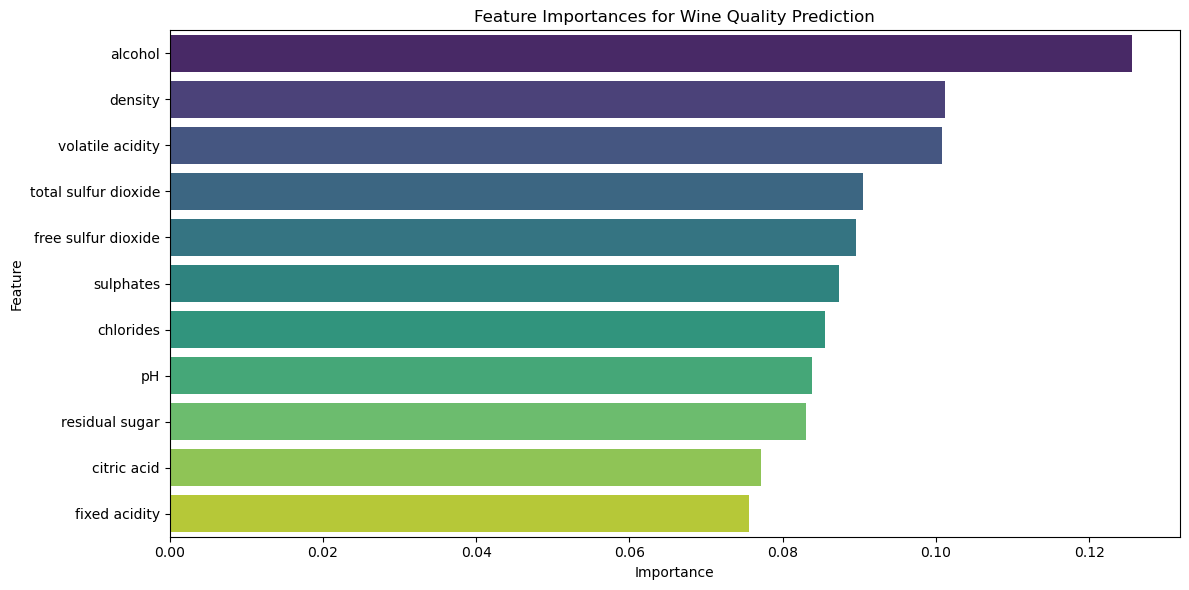

In [40]:
# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_wine, palette='viridis')
plt.title('Feature Importances for Wine Quality Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Alcohol have higher importance value and have a greater impact on wine quality predictions.**